In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
df.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('precision', 2)

In [6]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'new_tests_smoothed', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'tests_units', 'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_100k'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18861 entries, 0 to 18860
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18797 non-null  object 
 1   location                         18861 non-null  object 
 2   date                             18861 non-null  object 
 3   total_cases                      18861 non-null  int64  
 4   new_cases                        18861 non-null  int64  
 5   total_deaths                     18861 non-null  int64  
 6   new_deaths                       18861 non-null  int64  
 7   total_cases_per_million          18491 non-null  float64
 8   new_cases_per_million            18491 non-null  float64
 9   total_deaths_per_million         18491 non-null  float64
 10  new_deaths_per_million           18491 non-null  float64
 11  total_tests                      4957 non-null   float64
 12  new_tests         

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [9]:
df['total_cases'].value_counts()

0         3317
1          622
3          338
2          310
11         267
          ... 
67103        1
3400         1
3368         1
13599        1
132967       1
Name: total_cases, Length: 4977, dtype: int64

In [10]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,1.89e+04,18861.00,18861.00,18861.00,18491.00,18491.00,18491.00,18491.00,4.96e+03,4416.00,4957.00,4416.00,5380.00,5380.00,14464.00,1.88e+04,18047.00,17190.00,16962.00,17104.00,16963.00,11256.00,17123.00,17738.00,14023.00,13875.00,7398.00,15843.00
mean,1.65e+04,526.06,1096.14,34.77,475.51,13.15,20.83,0.59,2.26e+05,9697.52,10.55,0.39,8679.99,0.35,55.16,1.10e+08,429.28,32.49,9.96,6.35,23464.15,9.88,244.39,8.00,11.38,32.64,55.76,3.25
std,1.71e+05,4744.83,11757.60,334.57,1412.51,64.06,89.82,3.65,7.96e+05,31672.80,19.90,0.61,26885.11,0.52,35.59,6.96e+08,1859.51,8.93,6.49,4.46,21453.80,17.30,119.23,4.01,10.58,13.18,30.81,2.62
min,0.00e+00,-2461.00,0.00,0.00,0.00,-265.19,0.00,0.00,1.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,8.09e+02,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10
25%,4.00e+00,0.00,0.00,0.00,0.49,0.00,0.00,0.00,7.47e+03,519.00,0.31,0.03,609.50,0.03,15.47,2.42e+06,42.73,25.40,4.03,2.38,6885.83,0.50,145.18,5.31,1.90,21.40,24.65,1.40
50%,7.70e+01,2.00,1.00,0.00,22.70,0.23,0.14,0.00,4.00e+04,1889.50,2.25,0.14,2024.00,0.15,68.78,9.89e+06,93.11,32.40,7.92,5.03,15847.42,1.50,233.07,7.11,7.10,31.40,59.61,2.60
75%,1.04e+03,41.00,22.00,1.00,235.09,5.56,3.98,0.05,1.43e+05,6059.50,12.33,0.53,5723.50,0.49,86.24,3.69e+07,227.32,41.00,15.41,9.84,35973.78,10.00,311.11,10.08,20.00,40.80,84.17,4.28
max,4.96e+06,100548.00,327904.00,10520.00,19329.37,4944.38,1208.09,200.04,1.22e+07,403959.00,168.75,7.29,366278.00,4.99,100.00,7.79e+09,19347.50,48.20,27.05,18.49,116935.60,77.60,724.42,23.36,44.00,78.10,99.00,13.80


In [11]:
df.sort_values(by='total_cases', ascending=False).head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18796,OWID_WRL,World,2020-05-21,4960975,99001,327904,4748,636.45,12.70,42.07,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18795,OWID_WRL,World,2020-05-20,4861974,95075,323156,5228,623.75,12.20,41.46,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18794,OWID_WRL,World,2020-05-19,4766899,87135,317928,3262,611.55,11.18,40.79,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18793,OWID_WRL,World,2020-05-18,4679764,81218,314666,2973,600.37,10.42,40.37,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18792,OWID_WRL,World,2020-05-17,4598546,94195,311693,4268,589.95,12.08,39.99,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71


In [12]:
df.sort_values(by=['total_cases', 'total_deaths'],
        ascending=[False, True]).head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18796,OWID_WRL,World,2020-05-21,4960975,99001,327904,4748,636.45,12.70,42.07,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18795,OWID_WRL,World,2020-05-20,4861974,95075,323156,5228,623.75,12.20,41.46,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18794,OWID_WRL,World,2020-05-19,4766899,87135,317928,3262,611.55,11.18,40.79,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18793,OWID_WRL,World,2020-05-18,4679764,81218,314666,2973,600.37,10.42,40.37,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71
18792,OWID_WRL,World,2020-05-17,4598546,94195,311693,4268,589.95,12.08,39.99,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79e+09,58.05,30.9,8.7,5.36,15469.21,10.0,233.07,8.51,6.43,34.63,60.13,2.71


In [13]:
df.loc[0:5, 'location':'new_cases']

,location,date,total_cases,new_cases
0,Aruba,2020-03-13,2,2
1,Aruba,2020-03-20,4,2
2,Aruba,2020-03-24,12,8
3,Aruba,2020-03-25,17,5
4,Aruba,2020-03-26,19,2
5,Aruba,2020-03-27,28,9


In [14]:
df.iloc[0:5, 1:len(df)]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,Aruba,2020-03-13,2,2,0,0,18.73,18.73,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.09,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,Aruba,2020-03-20,4,2,0,0,37.47,18.73,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.09,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,Aruba,2020-03-24,12,8,0,0,112.39,74.93,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.09,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,Aruba,2020-03-25,17,5,0,0,159.23,46.83,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.09,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,Aruba,2020-03-26,19,2,0,0,177.96,18.73,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.84,106766.0,584.8,41.2,13.09,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [15]:
df[-1:][['location', 'new_cases']]

,location,new_cases
18860,International,-9


In [16]:
df.iloc[0:5, 3:6].apply(np.max) 

total_cases     19
new_cases        8
total_deaths     0
dtype: int64

In [17]:
columns_to_show = ['total_cases', 'new_cases', 'total_deaths']

df.groupby(['location'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total_cases                         new_cases                 \
                      mean       std amin     amax      mean       std amin   
location                                                                      
Afghanistan       9.26e+02  1.81e+03    0     8145     61.24    135.87    0   
Albania           4.77e+02  3.23e+02    2      964     13.03      7.92    0   
Algeria           1.38e+03  2.13e+03    0     7542     54.65     69.21    0   
Andorra           5.37e+02  2.65e+02    1      762     11.04     12.56    0   
Angola            2.45e+01  1.51e+01    2       52      0.85      1.53    0   
...                    ...       ...  ...      ...       ...       ...  ...   
Western Sahara    6.00e+00  0.00e+00    6        6      0.23      1.18    0   
World             1.09e+06  1.51e+06   27  4960975  34692.13  37853.13    0   
Yemen             3.28e+01  4.99e+01    1      180      4.29      7.66    0   
Zambia            1.53e+02  2.23e+02    2      832     13.00     35.87    0   
Zimbabwe          2.30e+01  1.42e+01    1       48      0.77      1.23    0   

                       total_deaths                          
                  amax         mean        std amin    amax  
location                                                     
Afghanistan       1063        25.54      47.01    0     187  
Albania             34        19.50      11.76    0      31  
Algeria            199       142.24     202.32    0     568  
Andorra             43        27.70      18.66    0      51  
Angola               7         1.75       0.70    0       3  
...                ...          ...        ...  ...     ...  
Western Sahara       6         0.00       0.00    0       0  
World           100548     72387.36  105672.97    0  327904  
Yemen               37         5.29       7.97    0      29  
Zambia             208         2.72       2.41    0       7  
Zimbabwe             6         2.76       1.38    0       4  

[212 rows x 12 columns]

In [18]:
pd.crosstab(df['location'], df['date'])

date,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,...,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
World,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
pd.crosstab(df['location'], df['date'], normalize=True)

date,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,...,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,...,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05
Albania,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,...,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05
Algeria,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,...,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05,5.30e-05
Andorra,0.00e+00,0.00e+00,0.00e+00,0.00e+

In [20]:
df[df['location'] == 'Ukraine']

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17515,UKR,Ukraine,2020-03-04,1,1,0,0,0.02,0.02,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17516,UKR,Ukraine,2020-03-13,3,2,0,0,0.07,0.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.59,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17517,UKR,Ukraine,2020-03-16,3,0,0,0,0.07,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.51,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17518,UKR,Ukraine,2020-03-17,5,2,0,0,0.11,0.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.95,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17519,UKR,Ukraine,2020-03-18,14,9,0,0,0.32,0.21,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17520,UKR,Ukraine,2020-03-19,19,5,2,2,0.43,0.11,0.05,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17521,UKR,Ukraine,2020-03-20,26,7,2,0,0.59,0.16,0.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17522,UKR,Ukraine,2020-03-21,26,0,3,1,0.59,0.00,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17523,UKR,Ukraine,2020-03-22,41,15,3,0,0.94,0.34,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17524,UKR,Ukraine,2020-03-23,47,6,3,0,1.07,0.14,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8


In [21]:
df[df['location'] == 'Ukraine'].groupby(['location'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total_cases                      new_cases                    \
                mean      std amin   amax      mean     std amin amax   
location                                                                
Ukraine      6522.58  6451.01    1  19230     278.7  207.33    0  789   

         total_deaths                    
                 mean     std amin amax  
location                                 
Ukraine        172.52  173.62    0  564

In [22]:
pd.crosstab(df[df['location'] == 'Ukraine']['location'], df['date'])

date,2020-03-04,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ukraine,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [23]:
df[df['location'] == 'Ukraine'].pivot_table(['total_cases', 
                'new_cases', 
                'total_deaths',
                'new_deaths'], ['date'], 
               aggfunc='mean')

,new_cases,new_deaths,total_cases,total_deaths
date,,,,
2020-03-04,1,0,1,0
2020-03-13,2,0,3,0
2020-03-16,0,0,3,0
2020-03-17,2,0,5,0
2020-03-18,9,0,14,0
2020-03-19,5,2,19,2
2020-03-20,7,0,26,2
2020-03-21,0,1,26,3
2020-03-22,15,0,41,3


In [24]:
df[df['location'] == 'Ukraine'].nsmallest(3, 'new_cases')

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17517,UKR,Ukraine,2020-03-16,3,0,0,0,0.07,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.51,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17522,UKR,Ukraine,2020-03-21,26,0,3,1,0.59,0.0,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17560,UKR,Ukraine,2020-04-28,9009,0,220,0,206.00,0.0,5.03,0.00,98719.0,5200.0,2.26,0.12,4859.0,0.11,units unclear,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8


In [25]:
df[df['location'] == 'Ukraine'].nlargest(3, 'new_cases')

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17548,UKR,Ukraine,2020-04-16,4161,789,116,18,95.14,18.04,2.65,0.41,42823.0,NaN,0.98,NaN,3174.0,0.07,units unclear,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17550,UKR,Ukraine,2020-04-18,5106,644,133,8,116.75,14.72,3.04,0.18,NaN,NaN,NaN,NaN,3529.0,0.08,units unclear,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17555,UKR,Ukraine,2020-04-23,7170,578,187,13,163.95,13.22,4.28,0.30,72296.0,NaN,1.65,NaN,4210.0,0.10,units unclear,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8


In [26]:
df_u = df[df['location'] == 'Ukraine'].sort_values(by=['new_cases', 'date'],
        ascending=[True, True])

In [27]:
df_u.loc[df_u['new_cases'].ne(0).idxmax():].nsmallest(3, 'new_cases')

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17515,UKR,Ukraine,2020-03-04,1,1,0,0,0.02,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17516,UKR,Ukraine,2020-03-13,3,2,0,0,0.07,0.05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.59,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17518,UKR,Ukraine,2020-03-17,5,2,0,0,0.11,0.05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.95,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8


In [28]:
df_u.loc[df_u['new_cases'].ne(0).idxmax():].nsmallest(3, 'new_cases').to_markdown()

'|       | iso_code   | location   | date                |   total_cases |   new_cases |   total_deaths |   new_deaths |   total_cases_per_million |   new_cases_per_million |   total_deaths_per_million |   new_deaths_per_million |   total_tests |   new_tests |   new_tests_smoothed |   total_tests_per_thousand |   new_tests_per_thousand |   new_tests_smoothed_per_thousand |   tests_units |   stringency_index |   population |   population_density |   median_age |   aged_65_older |   aged_70_older |   gdp_per_capita |   extreme_poverty |   cvd_death_rate |   diabetes_prevalence |   female_smokers |   male_smokers |   handwashing_facilities |   hospital_beds_per_100k |\n|------:|:-----------|:-----------|:--------------------|--------------:|------------:|---------------:|-------------:|--------------------------:|------------------------:|---------------------------:|-------------------------:|--------------:|------------:|---------------------:|---------------------------:|--------------

In [29]:
date_from = "2018-05-03"
date_to = "2020-05-20"
pd.date_range(date_from, date_to, freq="m")


DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', freq='M')

In [30]:
from datetime import date
from dateutil.relativedelta import relativedelta
today = date.today()
weeks = 52
[period.strftime('%Y-%W') for period in pd.period_range(start=today + relativedelta(weeks=-weeks),
                                                        end=today,
                                                        freq='W')]


['2019-20',
 '2019-21',
 '2019-22',
 '2019-23',
 '2019-24',
 '2019-25',
 '2019-26',
 '2019-27',
 '2019-28',
 '2019-29',
 '2019-30',
 '2019-31',
 '2019-32',
 '2019-33',
 '2019-34',
 '2019-35',
 '2019-36',
 '2019-37',
 '2019-38',
 '2019-39',
 '2019-40',
 '2019-41',
 '2019-42',
 '2019-43',
 '2019-44',
 '2019-45',
 '2019-46',
 '2019-47',
 '2019-48',
 '2019-49',
 '2019-50',
 '2019-51',
 '2020-00',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2020-13',
 '2020-14',
 '2020-15',
 '2020-16',
 '2020-17',
 '2020-18',
 '2020-19',
 '2020-20']

In [31]:
[(today + relativedelta(weeks=-week)).strftime('%Y-%V') for week in range(weeks, -1, -1)]

['2019-21',
 '2019-22',
 '2019-23',
 '2019-24',
 '2019-25',
 '2019-26',
 '2019-27',
 '2019-28',
 '2019-29',
 '2019-30',
 '2019-31',
 '2019-32',
 '2019-33',
 '2019-34',
 '2019-35',
 '2019-36',
 '2019-37',
 '2019-38',
 '2019-39',
 '2019-40',
 '2019-41',
 '2019-42',
 '2019-43',
 '2019-44',
 '2019-45',
 '2019-46',
 '2019-47',
 '2019-48',
 '2019-49',
 '2019-50',
 '2019-51',
 '2019-52',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2020-13',
 '2020-14',
 '2020-15',
 '2020-16',
 '2020-17',
 '2020-18',
 '2020-19',
 '2020-20',
 '2020-21']

In [32]:
tf = pd.read_csv(f'src/mocks/data/table.csv')
tf.to_sql('table', con=engine, if_exists="append", index=False)

FileNotFoundError: [Errno 2] File src/mocks/data/table.csv does not exist: 'src/mocks/data/table.csv'

In [33]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18861 entries, 0 to 18860
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         18797 non-null  object        
 1   location                         18861 non-null  object        
 2   date                             18861 non-null  datetime64[ns]
 3   total_cases                      18861 non-null  int64         
 4   new_cases                        18861 non-null  int64         
 5   total_deaths                     18861 non-null  int64         
 6   new_deaths                       18861 non-null  int64         
 7   total_cases_per_million          18491 non-null  float64       
 8   new_cases_per_million            18491 non-null  float64       
 9   total_deaths_per_million         18491 non-null  float64       
 10  new_deaths_per_million           18491 non-null  float64  

In [34]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.14 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.44 MB


In [34]:
def mem_usage(obj_t):
    if isinstance(obj_t, pd.DataFrame):
        usage_b = obj_t.memory_usage(deep=True).sum()
    else:
        usage_b = obj_t.memory_usage(deep=True)
    usage_kb = usage_b / 1024 
    return "{:03.2f} KB".format(usage_kb)

df_int = df_u.select_dtypes(include=['int64'])
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes, converted_int.dtypes],axis=1)
compare_ints.columns = ['Було', 'Стало']
compare_ints.apply(pd.Series.value_counts)

4.70 KB
3.01 KB


,Було,Стало
uint8,NaN,1.0
uint16,NaN,3.0
int64,4.0,NaN


In [35]:
converted_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 17517 to 17548
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   total_cases   69 non-null     uint16
 1   new_cases     69 non-null     uint16
 2   total_deaths  69 non-null     uint16
 3   new_deaths    69 non-null     uint8 
dtypes: uint16(3), uint8(1)
memory usage: 3.0 KB


In [36]:
df_u

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,new_tests_smoothed,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17517,UKR,Ukraine,2020-03-16,3,0,0,0,0.07,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.51,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17522,UKR,Ukraine,2020-03-21,26,0,3,1,0.59,0.00,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17560,UKR,Ukraine,2020-04-28,9009,0,220,0,206.00,0.00,5.03,0.00,98719.0,5200.0,2.26,0.12,4859.0,0.11,units unclear,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17515,UKR,Ukraine,2020-03-04,1,1,0,0,0.02,0.02,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17516,UKR,Ukraine,2020-03-13,3,2,0,0,0.07,0.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.59,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17518,UKR,Ukraine,2020-03-17,5,2,0,0,0.11,0.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.95,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17520,UKR,Ukraine,2020-03-19,19,5,2,2,0.43,0.11,0.05,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17524,UKR,Ukraine,2020-03-23,47,6,3,0,1.07,0.14,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17521,UKR,Ukraine,2020-03-20,26,7,2,0,0.59,0.16,0.05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8
17519,UKR,Ukraine,2020-03-18,14,9,0,0,0.32,0.21,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.06,4.37e+07,77.39,41.4,16.46,11.13,7894.39,0.1,539.85,7.11,13.5,47.4,NaN,8.8


In [37]:
%matplotlib inline

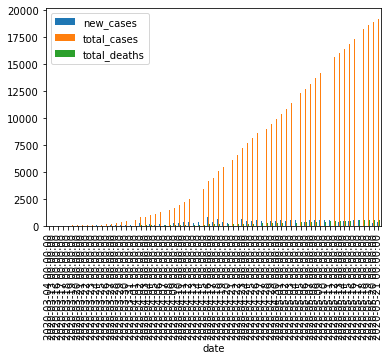

In [38]:
df_u.pivot_table(['total_cases', 
                'new_cases', 
                'total_deaths'], ['date'], 
               aggfunc='mean').plot(kind='bar')

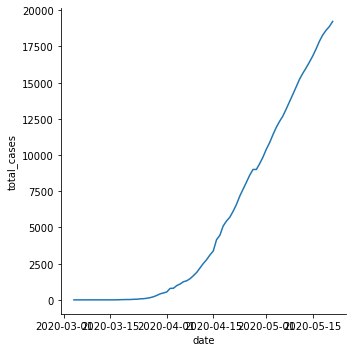

In [39]:
from matplotlib import pyplot
import seaborn
df_pivot = df_u[['total_cases', 'new_cases','date']]
seaborn.relplot(y='total_cases', x='date', kind="line", data=df_pivot)
pyplot.savefig('pivot.png', dpi=600)

In [40]:
df_u[['total_cases', 'date']]

,total_cases,date
17517,3,2020-03-16
17522,26,2020-03-21
17560,9009,2020-04-28
17515,1,2020-03-04
17516,3,2020-03-13
17518,5,2020-03-17
17520,19,2020-03-19
17524,47,2020-03-23
17521,26,2020-03-20
17519,14,2020-03-18
